In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("streaming_experiments/remind_imagenet/accuracies_min_trained_0_max_trained_1000.json", "r") as read_file:
    data = json.load(read_file)
print(data)

{'base_classes_top1': [12.0, 30.0, 22.0, 20.0, 24.0, 18.0, 18.0, 20.0, 20.0, 12.0], 'non_base_classes_top1': [68.18000030517578, 61.07999801635742, 57.0533332824707, 52.314998626708984, 51.41200256347656, 49.75666809082031, 47.394287109375, 46.48749923706055, 45.2400016784668], 'seen_classes_top1': [12.0, 54.959999084472656, 52.173336029052734, 50.73500061035156, 47.52800369262695, 46.86333465576172, 45.691429138183594, 44.3125, 43.96889114379883, 42.85600280761719], 'base_classes_top5': [28.0, 52.0, 56.0, 36.0, 34.0, 30.0, 28.0, 32.0, 34.0, 30.0], 'non_base_classes_top5': [88.68000030517578, 83.91999816894531, 79.66000366210938, 76.59500122070312, 75.69600677490234, 74.66667175292969, 72.65714263916016, 71.5, 70.3822250366211], 'seen_classes_top5': [28.0, 79.1500015258789, 76.3800048828125, 73.98999786376953, 72.30000305175781, 71.34333801269531, 70.63428497314453, 69.61249542236328, 69.05110931396484, 68.03600311279297], '0_base_class_top1': [8.0, 18.0, 22.0, 12.0, 12.0, 4.0, 10.0, 1

In [3]:
# First ones are erroneous
seen_top1 = data['seen_classes_top1'][1:]
seen_top5 = data['seen_classes_top5'][1:]

# Make dfs of base class accuracies over course of training
num_classes_trained = list(range(100, 1100, 100))
top1 = pd.DataFrame(index=num_classes_trained)
top5 = pd.DataFrame(index=num_classes_trained)
for label in data:
    try:
        int(label[0]) # Get only base classes, which start with numbers
        label_split = label.split("_")
        col_name = label_split[0]
        if label[-1] == "1":
            top1[col_name] = data[label]
        else:
            top5[col_name] = data[label]
    except:
        pass

top1['avg'] = top1.mean(axis=1)
top1['std'] = top1.std(axis=1)
top5['avg'] = top5.mean(axis=1)
top5['std'] = top5.std(axis=1)

In [4]:
top1

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,avg,std
100,8.0,14.0,18.0,26.0,2.0,28.0,26.0,6.0,32.0,14.0,...,12.0,14.0,2.0,34.0,10.0,0.0,2.0,12.0,17.70,11.229871
200,18.0,32.0,26.0,34.0,30.0,22.0,74.0,56.0,46.0,36.0,...,64.0,60.0,52.0,24.0,74.0,82.0,60.0,30.0,41.74,18.145313
300,22.0,10.0,22.0,38.0,26.0,18.0,60.0,34.0,40.0,30.0,...,56.0,54.0,54.0,18.0,48.0,80.0,42.0,22.0,34.36,17.498297
400,12.0,10.0,22.0,32.0,30.0,10.0,60.0,34.0,42.0,24.0,...,50.0,42.0,42.0,12.0,46.0,76.0,42.0,20.0,31.78,18.386723
500,12.0,12.0,30.0,30.0,28.0,16.0,54.0,42.0,26.0,22.0,...,50.0,40.0,46.0,8.0,42.0,58.0,32.0,24.0,28.38,17.556070
600,4.0,6.0,16.0,18.0,14.0,14.0,46.0,38.0,24.0,26.0,...,52.0,38.0,36.0,12.0,44.0,58.0,34.0,18.0,24.12,16.844750
700,10.0,12.0,12.0,18.0,6.0,2.0,46.0,36.0,26.0,26.0,...,42.0,26.0,28.0,14.0,38.0,54.0,24.0,18.0,21.30,15.371077
800,14.0,6.0,18.0,16.0,22.0,6.0,54.0,34.0,20.0,14.0,...,46.0,28.0,46.0,16.0,40.0,48.0,20.0,20.0,22.74,16.108768
900,16.0,6.0,28.0,18.0,22.0,8.0,42.0,34.0,20.0,30.0,...,60.0,42.0,46.0,12.0,36.0,58.0,34.0,20.0,23.80,16.503333
1000,14.0,10.0,24.0,14.0,16.0,10.0,54.0,24.0,14.0,18.0,...,46.0,22.0,42.0,12.0,36.0,54.0,28.0,12.0,21.40,15.477726


In [5]:
top5

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,avg,std
100,20.0,30.0,30.0,46.0,22.0,36.0,54.0,28.0,58.0,34.0,...,20.0,26.0,16.0,66.0,32.0,4.0,10.0,28.0,36.42,17.332732
200,42.0,58.0,80.0,48.0,58.0,48.0,86.0,72.0,70.0,64.0,...,84.0,76.0,70.0,42.0,88.0,86.0,86.0,52.0,69.62,14.677043
300,34.0,40.0,64.0,44.0,52.0,38.0,78.0,62.0,66.0,48.0,...,78.0,72.0,72.0,38.0,70.0,84.0,72.0,56.0,61.30,16.454483
400,28.0,38.0,50.0,40.0,44.0,40.0,80.0,64.0,64.0,48.0,...,74.0,64.0,58.0,34.0,72.0,86.0,64.0,36.0,56.98,16.905609
500,32.0,52.0,58.0,40.0,50.0,38.0,72.0,62.0,48.0,46.0,...,72.0,62.0,62.0,24.0,70.0,82.0,66.0,34.0,55.12,16.968960
600,24.0,34.0,48.0,38.0,38.0,40.0,62.0,54.0,46.0,48.0,...,68.0,56.0,60.0,22.0,66.0,82.0,62.0,30.0,49.58,16.800702
700,22.0,34.0,34.0,36.0,32.0,22.0,68.0,54.0,38.0,40.0,...,64.0,50.0,60.0,24.0,58.0,80.0,56.0,28.0,46.44,17.363364
800,24.0,36.0,48.0,36.0,32.0,30.0,68.0,62.0,42.0,34.0,...,72.0,60.0,60.0,32.0,58.0,76.0,52.0,32.0,48.30,17.441044
900,30.0,48.0,54.0,40.0,42.0,28.0,66.0,58.0,36.0,42.0,...,78.0,62.0,62.0,22.0,66.0,78.0,60.0,34.0,49.46,18.156773
1000,28.0,42.0,54.0,32.0,36.0,28.0,80.0,48.0,36.0,40.0,...,66.0,50.0,60.0,24.0,56.0,80.0,54.0,30.0,46.92,18.285338


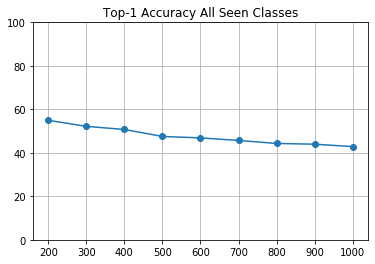

In [103]:
# Top-1 accuracy on all seen classes
plt.plot(num_classes_trained[1:], seen_top1, 'o-')
plt.ylim([0, 100])
plt.grid()
plt.title("Top-1 Accuracy All Seen Classes")
plt.show()

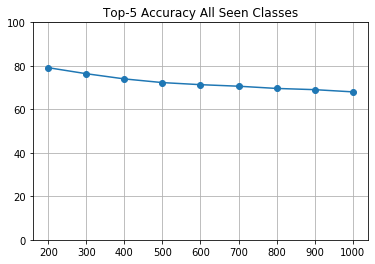

In [104]:
# Top-5 accuracy on all seen classes--much higher than Top-1
plt.plot(num_classes_trained[1:], seen_top5, 'o-')
plt.ylim([0, 100])
plt.grid()
plt.title("Top-5 Accuracy All Seen Classes")
plt.show()

In [40]:
def get_imagenet_indices(labels, min_val, max_val):
    return filter_by_class(labels, min_val, max_val)

def filter_by_class(labels, min_class, max_class):
    """
    Return the indices for the desired classes in [min_class, max_class)
    :param labels: class indices from numpy files
    :param min_class: minimum class included
    :param max_class: maximum class excluded
    :return: list of indices
    """
    ixs = list(np.where(np.logical_and(labels >= min_class, labels < max_class))[0])
    return ixs


# 1300 training instances for nearly all classes
train_labels = np.load('imagenet_files/imagenet_indices/imagenet_train_labels.npy')
image_cts = {}
for i in range(100):
    image_cts[i] = len(get_imagenet_indices(train_labels, i, i+1))
print(image_cts)

{0: 1300, 1: 1300, 2: 1300, 3: 1300, 4: 1300, 5: 1300, 6: 1300, 7: 1300, 8: 1300, 9: 1300, 10: 1218, 11: 1300, 12: 1300, 13: 1300, 14: 1300, 15: 1300, 16: 1300, 17: 1300, 18: 1300, 19: 1300, 20: 732, 21: 1270, 22: 1300, 23: 1300, 24: 1300, 25: 1300, 26: 1300, 27: 1300, 28: 1300, 29: 1300, 30: 1300, 31: 1300, 32: 1300, 33: 1300, 34: 1300, 35: 1300, 36: 1300, 37: 1300, 38: 1300, 39: 1300, 40: 1300, 41: 1300, 42: 1300, 43: 1300, 44: 1300, 45: 1300, 46: 1300, 47: 1300, 48: 1300, 49: 1300, 50: 1300, 51: 1300, 52: 1300, 53: 1300, 54: 1300, 55: 1300, 56: 1300, 57: 1300, 58: 1300, 59: 1300, 60: 1300, 61: 1300, 62: 1300, 63: 1300, 64: 1300, 65: 1155, 66: 1300, 67: 1300, 68: 1300, 69: 1300, 70: 1300, 71: 1300, 72: 1300, 73: 1300, 74: 1300, 75: 1300, 76: 1300, 77: 1300, 78: 1300, 79: 1300, 80: 1300, 81: 1300, 82: 1300, 83: 1300, 84: 1300, 85: 1300, 86: 1300, 87: 1300, 88: 1300, 89: 1137, 90: 1300, 91: 1264, 92: 1300, 93: 1300, 94: 1029, 95: 1300, 96: 1300, 97: 1249, 98: 1300, 99: 1300}


In [73]:
# 50 validation instances for all classes
val_labels = np.load('imagenet_files/imagenet_indices/imagenet_val_labels.npy')
val_cts = {}
for i in range(100):
    val_cts[i] = len(get_imagenet_indices(val_labels, i, i+1))
print(val_cts)

{0: 50, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50, 6: 50, 7: 50, 8: 50, 9: 50, 10: 50, 11: 50, 12: 50, 13: 50, 14: 50, 15: 50, 16: 50, 17: 50, 18: 50, 19: 50, 20: 50, 21: 50, 22: 50, 23: 50, 24: 50, 25: 50, 26: 50, 27: 50, 28: 50, 29: 50, 30: 50, 31: 50, 32: 50, 33: 50, 34: 50, 35: 50, 36: 50, 37: 50, 38: 50, 39: 50, 40: 50, 41: 50, 42: 50, 43: 50, 44: 50, 45: 50, 46: 50, 47: 50, 48: 50, 49: 50, 50: 50, 51: 50, 52: 50, 53: 50, 54: 50, 55: 50, 56: 50, 57: 50, 58: 50, 59: 50, 60: 50, 61: 50, 62: 50, 63: 50, 64: 50, 65: 50, 66: 50, 67: 50, 68: 50, 69: 50, 70: 50, 71: 50, 72: 50, 73: 50, 74: 50, 75: 50, 76: 50, 77: 50, 78: 50, 79: 50, 80: 50, 81: 50, 82: 50, 83: 50, 84: 50, 85: 50, 86: 50, 87: 50, 88: 50, 89: 50, 90: 50, 91: 50, 92: 50, 93: 50, 94: 50, 95: 50, 96: 50, 97: 50, 98: 50, 99: 50}


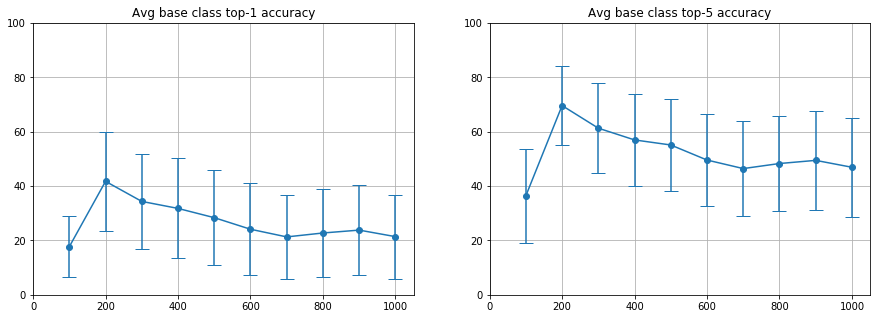

In [31]:
# Avg base class (non-weighted) accuracy 
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].errorbar(x=num_classes_trained, y=top1['avg'], fmt='o-', yerr=top1['std'], capsize=7)
axs[0].grid()
axs[0].set(title='Avg base class top-1 accuracy', xlim=[0, 1050], ylim=[0, 100])

axs[1].errorbar(x=num_classes_trained, y=top5['avg'], fmt='o-', yerr=top5['std'], capsize=7)
axs[1].grid()
axs[1].set(title='Avg base class top-5 accuracy', xlim=[0, 1050], ylim=[0, 100])

plt.show()

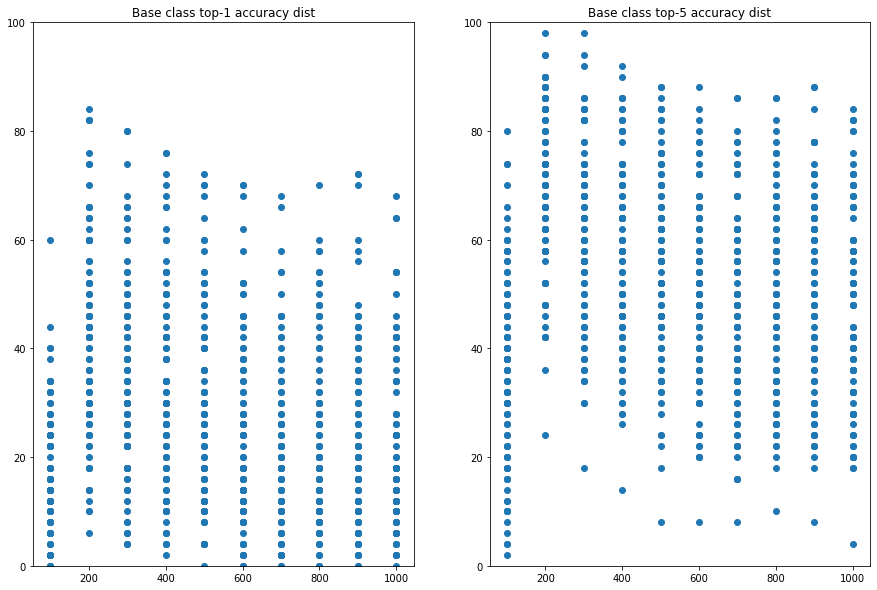

In [71]:
xs = []
ys_1 = []
ys_5 = []
for i in range(100, 1100, 100):
    ys_1 += list(top1.loc[i].iloc[:100].values)
    ys_5 += list(top5.loc[i].iloc[:100].values)
    xs += [i]*100
    
fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].scatter(xs, ys_1)
axs[0].set(title='Base class top-1 accuracy dist', ylim=[0, 100])
axs[1].scatter(xs, ys_5)
axs[1].set(title='Base class top-5 accuracy dist', ylim=[0, 100])
plt.show()

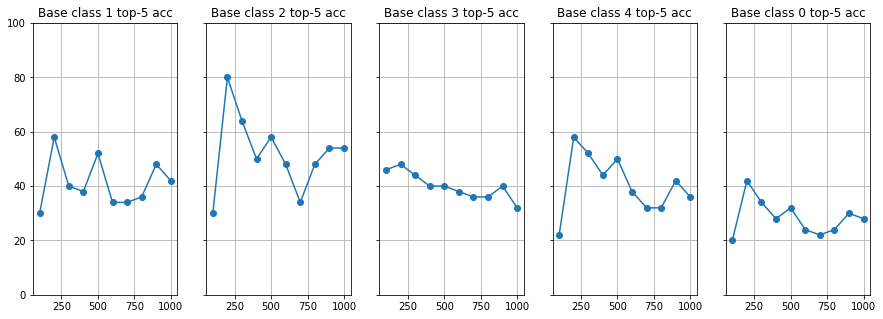

In [107]:
# Plotting some base class accuracies over the course of training
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axs[i-1].plot(num_classes_trained, top5[str(i)], 'o-')
    axs[i-1].grid()
    axs[i-1].set(title="Base class " + str(i) + " top-5 acc", ylim=[0, 100])

for ax in fig.get_axes():
    ax.label_outer()

plt.show()